# Document Classification of 20 NewsGroups Dataset

In [71]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import probscale
import matplotlib.pyplot as plt
%matplotlib inline

### Getting data from Scikit-Learn Datasets

In [72]:
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Parameters for Grid Search
To find best suitable parameters, we are using GridSearchCV on Machine Learning pipeline.

In [73]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3)}

## Lesser Code with Scikit Machine Learning PIPELINE
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

To avoid lengthy code such as:

`cnt_vec = CountVectorizer(stop_words="english")
trans_docs = cnt_vec.fit_transform(docs)
tfidf_vec = TfidfTransformer()
penalized_docs = tfidf_vec.fit_transform(trans_docs)
classifier = MultinomialNB()
classifier.fit(penalized_docs, target)`

It is helpful to use Machine Learning Pipeline instead of using so many lines of code for purpose.

In [74]:
classification_pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer='word')),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())])

## Applying GridSearch for Parameter Tuning or Optimization

In [75]:
grid_search = GridSearchCV(classification_pipeline, parameters, n_jobs=-1)
grid_search.fit(newsgroups_train.data, newsgroups_train.target)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        ...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (0.01, 0.001)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

## Best Parameters
In this case, we found the following parameters are useful to increase accuracy

'clf__alpha': 0.01 -> MultinomialNB(alpha=0.01)

'tfidf__use_idf': True -> TfidfTransformer(use_idf=True)

'vect__ngram_range': (1, 2) -> CountVectorizer(ngram_range=(1,2))

However, CountVectorizer is used with paramter 'stopwords' and 'analyzer' as it always good results on these paramters. Also, one may build custom analyzer for CountVectorizer for experimentations.

In [76]:
grid_search.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}

## Rebuilding Pipeline
In this step, we are rebuilding pipeline with optimal paramters found using Grid Search in previous step

In [77]:
classification_pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words="english", analyzer='word', ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', MultinomialNB(alpha=0.01))])

#### Fitting data to optimized machine learning classification pipeline

In [78]:
classification_pipeline.fit(newsgroups_train.data, newsgroups_train.target)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        ...near_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True))])

In [79]:
predicted_labels = classification_pipeline.predict(newsgroups_test.data)

## Plotting Confusion Matrix for Targeted vs Predicted Labels

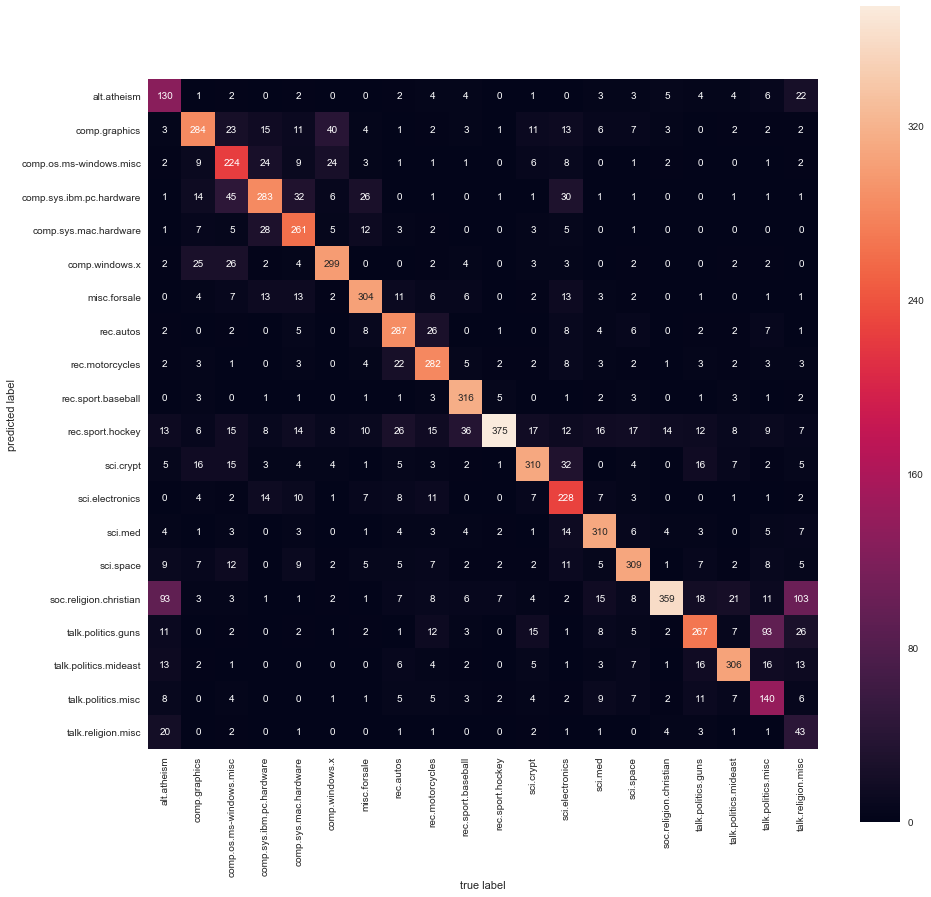

In [80]:
plt.figure(figsize=(15,15))
mat = confusion_matrix(newsgroups_test.target, predicted_labels)

sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Classifier Score: 70.6%

In [81]:
classifier_score = classification_pipeline.score(newsgroups_test.data, newsgroups_test.target)
print("Classifier Score: {}".format(round(classifier_score*100, 2)))

Classifier Score: 70.59


In [82]:
predicted_log_probabilities = classification_pipeline.predict_log_proba(newsgroups_test.data)

In [83]:
predicted_probabilities = classification_pipeline.predict_proba(newsgroups_test.data)

## Plotting Predicted Probabilities

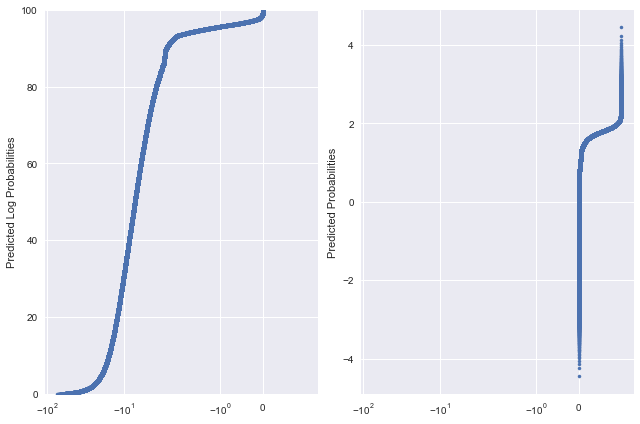

In [84]:
fig, (ax1, ax2) = plt.subplots(figsize=(9, 6), ncols=2, sharex=True)
common_opts = dict(
    probax='y',
    datascale='symlog',
    scatter_kws=dict(marker='.', linestyle='none')
)

fig = probscale.probplot(predicted_log_probabilities, ax=ax1, plottype='pp',
                         problabel='Predicted Log Probabilities',  **common_opts)

fig = probscale.probplot(predicted_probabilities, ax=ax2, plottype='qq',
                         problabel='Predicted Probabilities',  **common_opts)

fig.tight_layout()
sns.despine()

In [85]:
# you can reach out for any help on any project or data science help on skiyepe at abhinavwalia95